In [23]:
import pickle
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [4]:
dg = pd.read_csv("data.csv")
dg1 = pd.read_csv("fake_or_real_news.csv")

In [5]:
dg = dg.dropna()
dg1 = dg1.dropna()

In [6]:
dg.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [7]:
y = dg.Label
#y = dg1.label

In [8]:
X = dg.Body

In [9]:
X_train, X_test, y_train, y_test = train_test_split(dg['Body'], y, test_size = 0.33, random_state = 53)

In [10]:
count_vect = CountVectorizer()

In [11]:
X_train_counts = count_vect.fit_transform(X_train)

In [12]:
Y_test_counts = count_vect.transform(X_test)

In [16]:
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)

In [17]:
tfidf_transformer = TfidfTransformer()

In [18]:
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [19]:
Y_test_tfidf = tfidf_transformer.transform(Y_test_counts)

In [20]:
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [67]:
pred = clf.predict(Y_test_tfidf[0])

In [ ]:
predict = cross_val_predict(clf, X, y, cv=10, verbose=3)

In [68]:
score = accuracy_score(y_test, pred)

ValueError: Found input variables with inconsistent numbers of samples: [1317, 1]

In [62]:
print ('\033[1m Score: ' + '\033[1;34m {0:.2f}% \n'.format(score*100) + '\033[0m')

 Score:  81.70% 



In [63]:
cm = confusion_matrix(y_test, pred, labels=[0, 1])

In [64]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


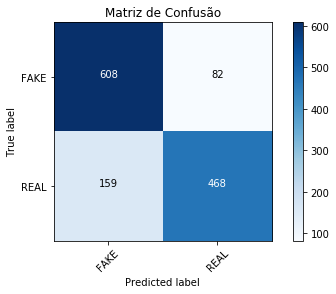

In [65]:
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'], title='Matriz de Confusão')

In [50]:
pickle.dump(clf, open("model.pkl","wb"))